In [1]:
library(reticulate)
sagemaker <- import('sagemaker')

In [2]:
role_arn <- sagemaker$get_execution_role()

In [3]:
session <- sagemaker$Session()
bucket <- session$default_bucket()
prefix <- ''

In [4]:
library(readr)
data_file <- 's3://partly-cloudy-common-area/hourly_issr_summary.csv'
mydata <- read_csv(file = sagemaker$s3$S3Downloader$read_file(data_file,
                                                              sagemaker_session= session),
                   col_names = TRUE)

In [5]:
df <- as.data.frame(mydata)

In [6]:
head(df)

,index,dateTime,iSSRs,floor,ceiling
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
1,7900,2020-06-01 00:00:00,7406,23564.34,41293.3
2,7205,2020-06-01 01:00:00,7250,23564.34,41293.3
3,1910,2020-06-01 02:00:00,6401,23564.34,41293.3
4,8435,2020-06-01 03:00:00,6448,23564.34,41293.3
5,3739,2020-06-01 04:00:00,7185,23564.34,41293.3
6,502,2020-06-01 05:00:00,7429,23564.34,41293.3


Sources
http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html#Bar%20Chart
http://rstudio-pubs-static.s3.amazonaws.com/392033_47b565c44b8246fca23a255bc59beabd.html

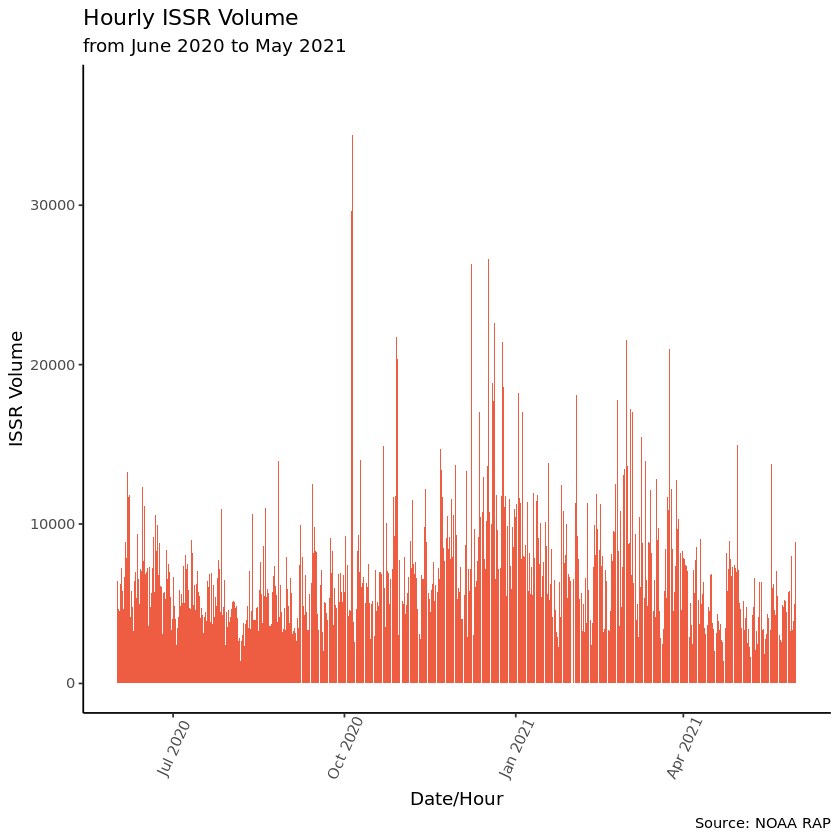

In [20]:
# plot
library(ggplot2)
library(dplyr)
theme_set(theme_classic())

# Plot
g <- ggplot(df, aes(dateTime, iSSRs))
g + geom_col(fill= "tomato2") + 
    labs(title= "Hourly ISSR Volume",
         subtitle= "from June 2020 to May 2021",
         caption= "Source: NOAA RAP",
         x= "Date/Hour", 
         y= "ISSR Volume") +
theme(axis.text.x = element_text(angle=65, vjust=0.6))

In [28]:
library(lubridate)
df$mon <- month(df$dateTime, label= TRUE)

In [29]:
head(df)

,index,dateTime,iSSRs,floor,ceiling,mon
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<ord>
1,7900,2020-06-01 00:00:00,7406,23564.34,41293.3,Jun
2,7205,2020-06-01 01:00:00,7250,23564.34,41293.3,Jun
3,1910,2020-06-01 02:00:00,6401,23564.34,41293.3,Jun
4,8435,2020-06-01 03:00:00,6448,23564.34,41293.3,Jun
5,3739,2020-06-01 04:00:00,7185,23564.34,41293.3,Jun
6,502,2020-06-01 05:00:00,7429,23564.34,41293.3,Jun


In [30]:
month_total <- df %>% group_by(mon) %>% summarize(monthlyiSSRs = sum(iSSRs, na.rm= TRUE))

In [31]:
month_total

mon,monthlyiSSRs
<ord>,<dbl>
Jan,6427921
Feb,5121588
Mar,6287976
Apr,3948918
May,3403485
Jun,4917631
Jul,4075105
Aug,3827339
Sep,4041602


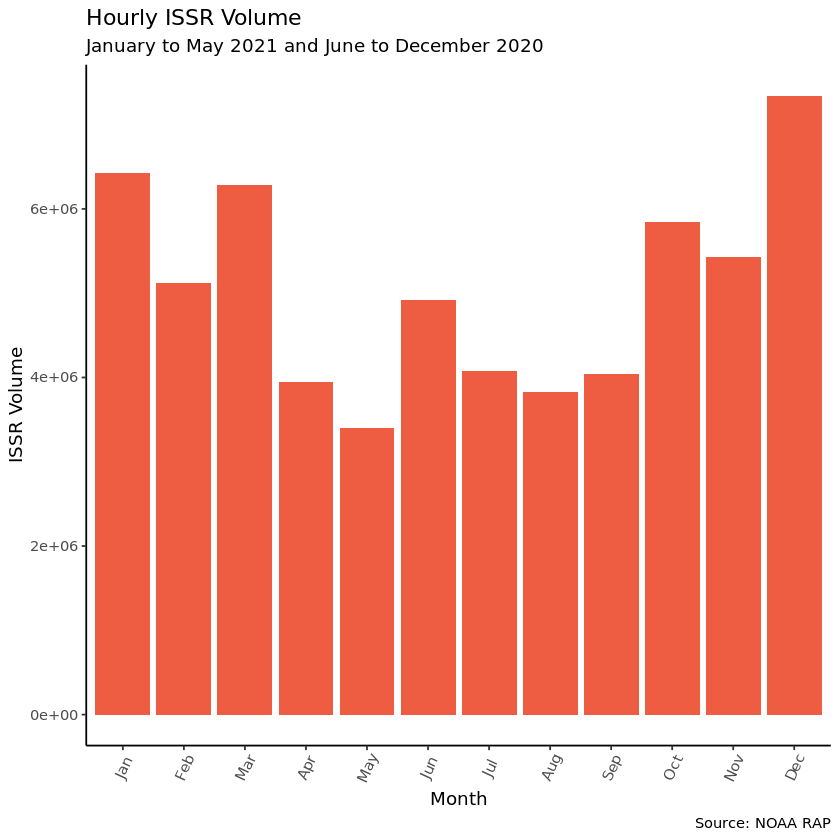

In [33]:
# Plot
g <- ggplot(month_total, aes(mon, monthlyiSSRs))
g + geom_col(fill= "tomato2") + 
    labs(title= "Hourly ISSR Volume",
         subtitle= "January to May 2021 and June to December 2020",
         caption= "Source: NOAA RAP",
         x= "Month", 
         y= "ISSR Volume") +
theme(axis.text.x = element_text(angle=65, vjust=0.6))

In [ ]:
# Plot
g <- ggplot(df, aes(dateTime, iSSRs))
g + geom_col(fill= "tomato2") + 
    labs(title= "Hourly ISSR Volume",
         subtitle= "from June 2020 to May 2021",
         caption= "Source: NOAA RAP",
         x= "Date/Hour", 
         y= "ISSR Volume") +
theme(axis.text.x = element_text(angle=65, vjust=0.6))

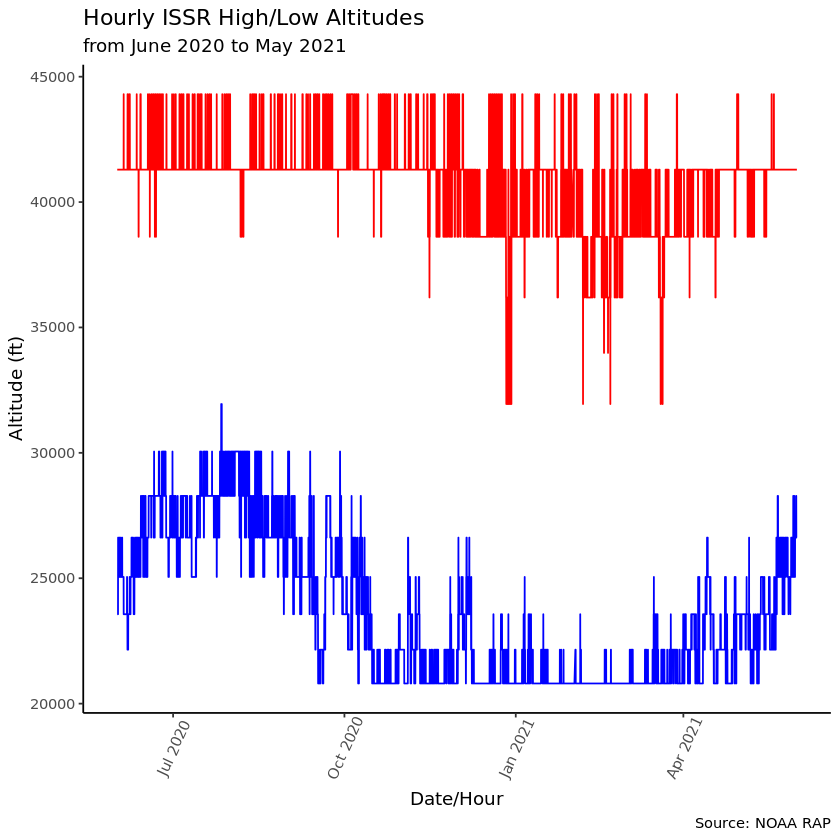

In [48]:
# Allow Default X Axis Labels
ggplot(df, aes(x= dateTime)) + 
  geom_line(aes(y= floor), color= 'blue') + geom_line(aes(y= ceiling), color= 'red') + 
  labs(title= "Hourly ISSR High/Low Altitudes", 
       subtitle= "from June 2020 to May 2021", 
       caption= "Source: NOAA RAP",
       x= "Date/Hour",
       y= "Altitude (ft)") +
theme(axis.text.x = element_text(angle= 65, vjust= 0.6))